# Quick Overview <a class="anchor" id="top"></a>

- **Prepared by:**
    
    - [Yalin Li](zoe.yalin.li@gmail.com)
    
To run tutorials in your browser, go to this [Binder page](https://mybinder.org/v2/gh/QSD-Group/QSDsan/main?filepath=%2Fdocs%2Fsource%2Ftutorials).

---

### Note

This tutorial serves as a quick primer to introduce the major (application programming interface) APIs/class in QSDsan and show you its capacities, for detailed instructions on these APIs, please follow the corresponding tutorials in the documentation.

---

In [1]:
import qsdsan as qs
print(f'This tutorial was made with qsdsan v{qs.__version__}.')

This tutorial was made with qsdsan v0.3.10.


In [2]:
# Major APIs/classes and related packages of QSDsan shown in the simplified unified modeling language (UML) diagram.
from IPython.display import Image
Image(url='https://lucid.app/publicSegments/view/c8de361f-7292-47e3-8870-d6f668691728/image.png', width=800)

In [3]:
# Thermodynamics and material flows are handled by `Component` and `WasteStream`
cmps = qs.Components.load_default()
qs.set_thermo(cmps)
cmps.show()

CompiledComponents([S_H2, S_CH4, S_CH3OH, S_Ac, S_Prop, S_F, S_U_Inf, S_U_E, C_B_Subst, C_B_BAP, C_B_UAP, C_U_Inf, X_B_Subst, X_OHO_PHA, X_GAO_PHA, X_PAO_PHA, X_GAO_Gly, X_PAO_Gly, X_OHO, X_AOO, X_NOO, X_AMO, X_PAO, X_MEOLO, X_FO, X_ACO, X_HMO, X_PRO, X_U_Inf, X_U_OHO_E, X_U_PAO_E, X_Ig_ISS, X_MgCO3, X_CaCO3, X_MAP, X_HAP, X_HDP, X_FePO4, X_AlPO4, X_AlOH, X_FeOH, X_PAO_PP_Lo, X_PAO_PP_Hi, S_NH4, S_NO2, S_NO3, S_PO4, S_K, S_Ca, S_Mg, S_CO3, S_N2, S_O2, S_CAT, S_AN, H2O])


In [4]:
# Each component is asscociated with many properties
cmps.S_CH4.show(chemical_info=True)

Component: S_CH4 (phase_ref='g')
[Names]  CAS: 74-82-8
         InChI: CH4/h1H4
         InChI_key: VNWKTOKETHGBQD-U...
         common_name: methane
         iupac_name: ('methane',)
         pubchemid: 297
         smiles: C
         formula: CH4
[Groups] Dortmund: <Empty>
         UNIFAC: <Empty>
         PSRK: <Empty>
         NIST: <Empty>
[Data]   MW: 16.042 g/mol
         Tm: 90.75 K
         Tb: 111.65 K
         Tt: 90.69 K
         Tc: 190.56 K
         Pt: 11691 Pa
         Pc: 4.599e+06 Pa
         Vc: 9.86e-05 m^3/mol
         Hf: -74534 J/mol
         S0: 186.3 J/K/mol
         LHV: -8.0257e+05 J/mol
         HHV: -8.9059e+05 J/mol
         Hfus: 940 J/mol
         Sfus: None
         omega: 0.008
         dipole: 0 Debye
         similarity_variable: 0.31167
         iscyclic_aliphatic: 0
         combustion: {'CO2': 1, 'O2'...

Component-specific properties:
[Others] measured_as: COD
         description: Dissolved Methane
         particle_size: Dissolved gas
         

In [5]:
# Streams records the flows of each component as well as thermodynamic information
ww = qs.WasteStream.codbased_inf_model('ww', flow_tot=100)
ww.show()

WasteStream: ww
 phase: 'l', T: 298.15 K, P: 101325 Pa
 flow (g/hr): S_F        7.5
              S_U_Inf    3.25
              C_B_Subst  4
              X_B_Subst  22.7
              X_U_Inf    5.58
              X_Ig_ISS   5.23
              S_NH4      2.5
              S_PO4      0.8
              S_K        2.8
              S_Ca       14
              S_Mg       5
              S_CO3      12
              S_N2       1.8
              S_CAT      0.3
              S_AN       1.2
              ...


/Users/yalinli_cabbi/opt/anaconda3/envs/demo/lib/python3.8/site-packages/qsdsan/_waste_stream.py:945: UserWarning: ignored concentration specified for H2O:0.0
  warn(f'ignored concentration specified for {bulk_liquid_ID}:{C_bulk}')


 WasteStream-specific properties:
  pH         : 7.0
  Alkalinity : 10.0 mg/L
  COD        : 430.0 mg/L
  BOD        : 249.4 mg/L
  TC         : 265.0 mg/L
  TOC        : 137.6 mg/L
  TN         : 40.0 mg/L
  TKN        : 40.0 mg/L
  TP         : 10.0 mg/L
  TK         : 28.0 mg/L
 Component concentrations (mg/L):
  S_F          75.0
  S_U_Inf      32.5
  C_B_Subst    40.0
  X_B_Subst    226.7
  X_U_Inf      55.8
  X_Ig_ISS     52.3
  S_NH4        25.0
  S_PO4        8.0
  S_K          28.0
  S_Ca         140.0
  S_Mg         50.0
  S_CO3        120.0
  S_N2         18.0
  S_CAT        3.0
  S_AN         12.0
  ...


In [6]:
# Unit operations are modeled as `SanUnit` objects with process and desgin algorithms
print('`qsdsan` now has the following embedded unit operations:\n')
for i in dir(qs.sanunits):
    if not i.startswith('_'):
        print(i)

`qsdsan` now has the following embedded unit operations:

AnaerobicBaffledReactor
AnaerobicDigestion
BiogasCombustion
CSTR
ComponentSplitter
CropApplication
Decay
DryingBed
DynamicInfluent
ElectrochemicalCell
Excretion
FakeSplitter
FlatBottomCircularClarifier
HXprocess
HXutility
IdealClarifier
Lagoon
LiquidTreatmentBed
LumpedCost
MixTank
Mixer
PitLatrine
Pump
ReversedSplitter
SBR
SedimentationTank
SludgeSeparator
Splitter
StorageTank
Tank
Toilet
Trucking
UDDT


In [7]:
# Dynamic simulation is realized through the `Process` class
cmps = qs.processes.load_asm1_cmps()
qs.set_thermo(cmps)
asm1 = qs.processes.ASM1(Y_A=0.24, Y_H=0.67, f_P=0.08, i_XB=0.08, i_XP=0.06,
                        mu_H=4.0, K_S=10.0, K_O_H=0.2, K_NO=0.5, b_H=0.3,
                        eta_g=0.8, eta_h=0.8, k_h=3.0, K_X=0.1, mu_A=0.5,
                        K_NH=1.0, b_A=0.05, K_O_A=0.4, k_a=0.05, fr_SS_COD=0.75)
asm1.show()

CompiledProcesses([aero_growth_hetero, anox_growth_hetero, aero_growth_auto, decay_hetero, decay_auto, ammonification, hydrolysis, hydrolysis_N])


In [8]:
asm1.aero_growth_hetero

Process: aero_growth_hetero
[stoichiometry] S_S: -1.0/Y_H
                X_BH: 1.00
                S_O: 1.0*(Y_H - 1.0)/Y_H
                S_NH: -0.0800
                S_ALK: -0.0686
[reference]     X_BH
[rate equation] S_NH*S_O*S_S*X_BH*mu_H/((K_NH ...
[parameters]    Y_H: Y_H
                Y_A: Y_A
                f_P: f_P
                mu_H: mu_H
                K_S: K_S
                K_O_H: K_O_H
                K_NO: K_NO
                b_H: b_H
                mu_A: mu_A
                K_NH: K_NH
                K_O_A: K_O_A
                b_A: b_A
                eta_g: eta_g
                k_a: k_a
                k_h: k_h
                K_X: K_X
                eta_h: eta_h


In [9]:
asm1.rate_equations

,rate_equation
aero_growth_hetero,4.0*S_NH*S_O*S_S*X_BH/((S_NH + ...
anox_growth_hetero,0.64*S_NH*S_NO*S_S*X_BH/((S_NH ...
aero_growth_auto,0.5*S_NH*S_O*X_BA/((S_NH + 1.0)...
decay_hetero,0.3*X_BH
decay_auto,0.05*X_BA
ammonification,0.05*S_ND*X_BH
hydrolysis,3.0*X_BH*X_S*(0.16*S_NO/((S_NO ...
hydrolysis_N,3.0*X_BH*X_ND*(0.16*S_NO/((S_NO...


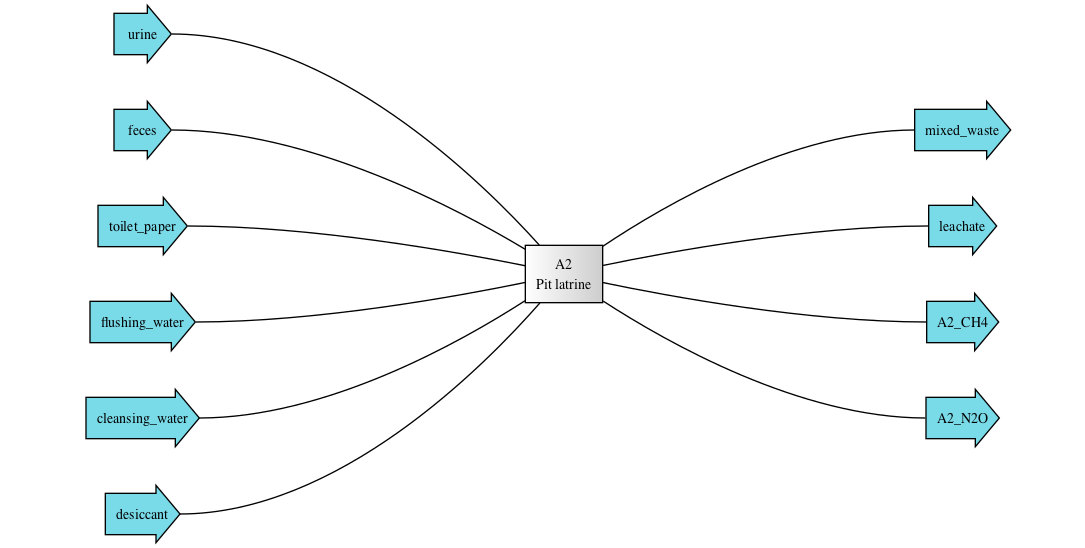

PitLatrine: A2
ins...
[0] urine  from  Excretion-A1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): NH3      0.213
                 NonNH3   0.0377
                 P        0.026
                 K        0.0694
                 Mg       0.00833
                 Ca       0.0117
                 H2O      55.4
                 OtherSS  2.55
    WasteStream-specific properties:
     pH         : 7.0
     COD        : 5156.4 mg/L
     TN         : 4282.2 mg/L
     TKN        : 4282.2 mg/L
     TP         : 443.3 mg/L
     TK         : 1182.7 mg/L
[1] feces  from  Excretion-A1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): NH3      0.00685
                 NonNH3   0.0274
                 P        0.0166
                 K        0.0244
                 Mg       0.0104
                 Ca       0.0792
                 H2O      8.85
                 OtherSS  1.4
    WasteStream-specific properties:
     pH         : 7.0
     COD        : 123381.8 mg/L
     TN         

In [10]:
# Upon simulation, you can easily retrive information related to a specific unit
# `exposan` contains systems developed using `qsdsan`,
# find more about the following exemplary system here:
# https://github.com/QSD-Group/EXPOsan/tree/main/exposan/bwaise
from exposan import bwaise as bw
# Each blue error in the diagram is a stream
qs.set_thermo(bw.cmps)
bw.A2

In [11]:
# The `result` function can show the simulated results
bw.A2.results()

Pit latrine                                      Units       A2
Design              Number of users per toilet               16
                    Parallel toilets                   2.85e+04
                    Emptying period                 yr      0.8
                    Single pit volume               m3     3.66
                    Single pit area                 m2      0.8
                    Single pit depth                       4.57
                    Cement                          kg    2e+07
                    Sand                            kg 9.05e+07
                    Gravel                          kg 3.65e+07
                    Brick                           kg 6.47e+06
                    Plastic                         kg 2.88e+05
                    Steel                           kg 9.58e+05
                    Wood                            m3 5.42e+03
                    Excavation                      m3 1.04e+05
Purchase cost       Total toilets                  USD 1.28e+07
Total purchase cost                                USD 1.28e+07
Utility cost                                    USD/hr        0
Additional OPEX                                 USD/hr     73.1

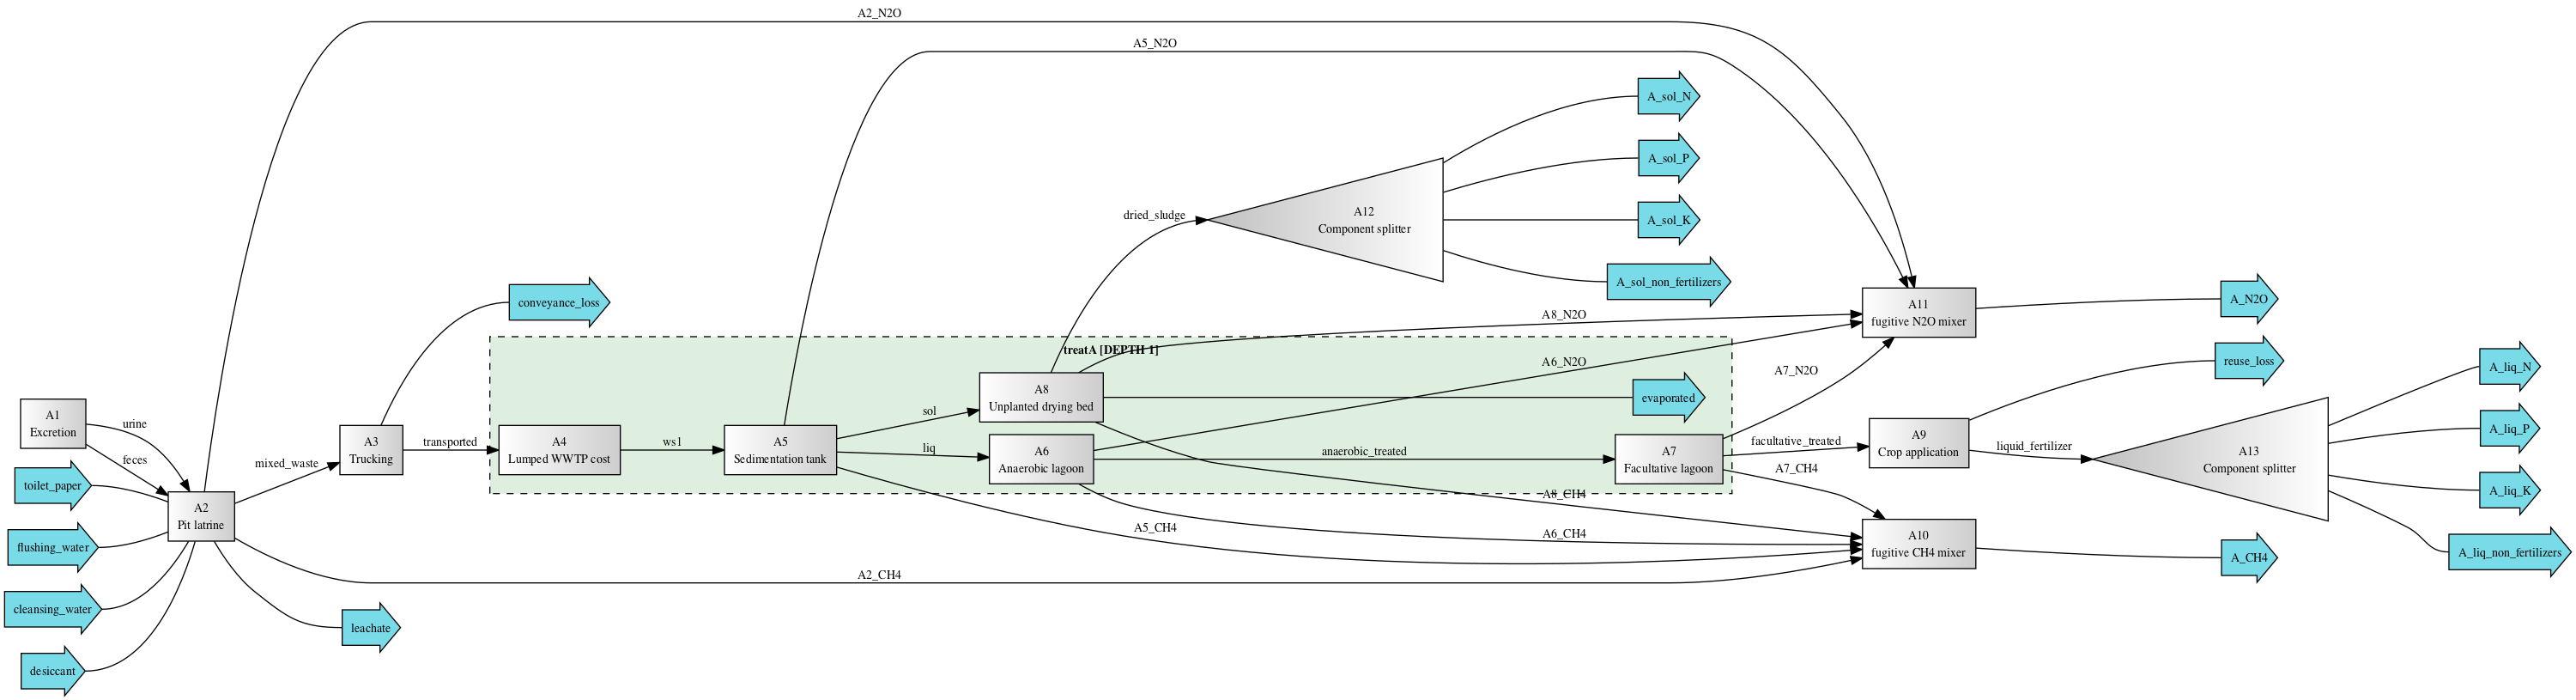

In [12]:
# You can create systems by linking different units
bw.sysA.diagram()

In [13]:
# `TEA` and `LCA` classes are used for techno-economic analysis and life cycle assessment
c = qs.currency
print('For sysA in the Bwaise study:\n')
for attr in ('NPV', 'EAC', 'CAPEX', 'AOC', 'sales', 'net_earnings'):
    uom = c if attr in ('NPV', 'CAPEX') else (c+('/yr'))
    print(f'{attr} is {getattr(bw.teaA, attr):,.0f} {uom}')

For sysA in the Bwaise study:

NPV is -42,012,332 USD
EAC is 6,706,241 USD/yr
CAPEX is 31,421,918 USD
AOC is 1,844,585 USD/yr
sales is 206,017 USD/yr
net_earnings is -1,638,568 USD/yr


In [14]:
bw.lcaA

LCA: sysA (lifetime 8 yr)
Impacts:
                           Construction  Transportation   Stream   Others    Total
GlobalWarming (kg CO2-eq)      3.13e+07        9.57e+05 1.82e+08 5.19e+04 2.14e+08


In [15]:
# Finally, uncertainty and sensitivity analyses are handled by `Model`
bw.modelA # below shows the uncertainty parameters

Model: COD recovery liquid cod
       COD recovery solid cod
       COD recovery gas cod
       COD recovery total cod
       N recovery liquid n
       N recovery solid n
       N recovery gas n
       N recovery total n
       P recovery liquid p
       P recovery solid p
       P recovery gas p
       P recovery total p
       K recovery liquid k
       K recovery solid k
       K recovery gas k
       K recovery total k
       TEA results annual net cost [USD/cap/yr]
       TEA results annual capex [USD/cap/yr]
       TEA results annual opex [USD/cap/yr]
       TEA results annual sales [USD/cap/yr]
       LCA results net emission globalwarming [kg CO2-eq/cap/yr]
       LCA results construction globalwarming [kg CO2-eq/cap/yr]
       LCA results transportation globalwarming [kg CO2-eq/cap/yr]
       LCA results direct emission globalwarming [kg CO2-eq/cap/yr]
       LCA results offset globalwarming [kg CO2-eq/cap/yr]
       LCA results other globalwarming [kg CO2-eq/cap/yr]
 Element

Finally, `qsdsan` also has a [stats](https://qsdsan.readthedocs.io/en/latest/stats.html) module with many global sensitivity analyses and visualization tools to generate quick and nice figures.

[Back to top](#top)